# Study on the evolution of the global population

__Pierre SAUNDERS__

## Librairies used

_tidyverse environment_
- [Doc](https://readxl.tidyverse.org/) - readxl : Allows reading of Excel files (xlsx/xls)
- [Doc](https://ggplot2.tidyverse.org/reference/) - ggplot2 : Allows you to make plots from DataFrame

_Others_
- [Doc](https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html) - gridExtra : Add-on to ggplot2 allowing multiple plots on the same image.

In [1]:
libraries = c("readxl", "ggplot2", "gridExtra")
code = lapply(libraries[!libraries %in% installed.packages()], install.packages, type = "binary", 
              repos = "http://cran.us.r-project.org")
code = lapply(libraries, library, character.only = TRUE)
rm(code, libraries)

## Study

It is well known that the world's population has grown to over seven and a half billion people and is constantly increasing.
On the other hand, it is said that the European population is increasing only slightly over the years and that it is getting older.
In order to verify these two statements, we will use the dataset [here](https://www.kaggle.com/theworldbank/global-population-estimates).
We will use the data in the range 1960-2010 to calculate the mean and variance of the random variables of interest.
Then we will use the data from 2011 to 2017 as a ́sample for hypothesis testing.
The same time series mining technique will be used to ́study the proportion of the population aged over 65 compared to the rest of the population.
Taking the data found [here](https://www.insee.fr/fr/statistiques/2387502), provided by INSEE, can we ́establish a correlation between the level of health expenditure and the ageing of the population ?

### Hypotheses

1. Positive correlation between year and world population.
2. Average European population of $[1960, 2010]$ < Average European population of $[2011, 2017]$.
3. World growth in $[1960, 2010]$ > European growth in $[2011, 2017]$.
4. Proportion of European person aged 65+ in $[1960, 2010]$ < Proportion of European person aged 65+ in $[2011, 2017]$.
5. Correlation between life expectancy and current health expenditure (INSEE) in Europe.

All hypotheses will be tested with a significance level of $\alpha = 0.05$

#### Student's test

##### t-value function for independent samples

- $\bar{X}$ : observed mean
- $n$ : size of the sample
- $\sigma$ : standard deviation

$\rightarrow$ for each population $A$ et $B$

Note: Variance = $\sigma^2$

$\large{t = \frac{\bar{X}_{A}-\bar{X}_B}{\sqrt{\frac{\sigma_{A}^2}{n_A}+\frac{\sigma_{B}^2}{n_B}}}}$

In [2]:
independants_student_test = function(pop_a, pop_b){
    (mean(pop_a) - mean(pop_b)) / sqrt(var(pop_a) / length(pop_a) + var(pop_b) / length(pop_b))
}

#### Hypothesis test

In [3]:
hypothesis_test = function(pop1, pop2, lower.tail = TRUE, alpha = 5e-2){
    t_value = independants_student_test(pop1, pop2)
    print(paste("t_value =", t_value))
    ddl = length(pop1) + length(pop2) - 2
    p_value = qt(alpha, df = ddl, lower.tail = lower.tail)
    print(paste("ddl =", ddl))
    print(paste("p_value =", p_value))
    if(lower.tail) print(paste("t_value < p_value ?", t_value < p_value))
    else           print(paste("t_value > p_value ?", t_value > p_value))
}

## Global Population estimates file (Kaggle)

In [4]:
estim = read.csv("data/data.csv", stringsAsFactors = TRUE)
estim = estim[-c((nrow(estim) - 4) : nrow(estim)),] # Removal of watermarks
colnames(estim)[1] = "Country.Name" # UTF-8 character correction
print(sprintf("The estim.xlsx file has %d * %d lines", ncol(estim), nrow(estim)))
head(estim)

[1] "The estim.xlsx file has 95 * 44807 lines"


,Country.Name,Country.Code,Series.Name,Series.Code,X1960..YR1960.,X1961..YR1961.,X1962..YR1962.,X1963..YR1963.,X1964..YR1964.,X1965..YR1965.,...,X2041..YR2041.,X2042..YR2042.,X2043..YR2043.,X2044..YR2044.,X2045..YR2045.,X2046..YR2046.,X2047..YR2047.,X2048..YR2048.,X2049..YR2049.,X2050..YR2050.
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,Age dependency ratio (% of working-age population),SP.POP.DPND,8.171774e+01,8.275591e+01,8.330457e+01,8.355074e+01,8.373445e+01,8.396216e+01,...,49.057098,48.405124,47.772482,47.153619,4.654737e+01,46.014974,45.488733,44.972113,44.471497,4.399248e+01
2,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.086262e+00,5.132609e+00,5.139524e+00,5.111895e+00,5.056182e+00,4.976304e+00,...,6.254638,6.431854,6.615935,6.808329,7.010657e+00,7.235972,7.465706,7.699483,7.935899,8.175734e+00
3,Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,7.663148e+01,7.762330e+01,7.816505e+01,7.843884e+01,7.867827e+01,7.898586e+01,...,42.802460,41.973270,41.156547,40.345290,3.953671e+01,38.779002,38.023028,37.272630,36.535598,3.581675e+01
4,Afghanistan,AFG,"Age population, age 0, female, interpolated",SP.POP.AG00.FE.IN,1.785560e+05,1.826740e+05,1.854340e+05,1.875130e+05,1.899450e+05,1.935530e+05,...,NA,NA,NA,NA,4.520000e+05,NA,NA,NA,NA,4.300000e+05
5,Afghanistan,AFG,"Age population, age 0, male, interpolated",SP.POP.AG00.MA.IN,1.776350e+05,1.815880e+05,1.858520e+05,1.904620e+05,1.954980e+05,2.010140e+05,...,NA,NA,NA,NA,4.760000e+05,NA,NA,NA,NA,4.520000e+05
6,Afghanistan,AFG,"Age population, age 01, female, interpolated",SP.POP.AG01.FE.IN,1.623200e+05,1.714910e+05,1.699620e+05,1.738000e+05,1.779260e+05,1.825620e+05,...,NA,NA,NA,NA,4.540000e+05,NA,NA,NA,NA,4.320000e+05


### Transformation, pre-processing

The database is very large (43 MB for 95 columns * 44807 rows), but only certain information is of interest to us.
We will keep only the rows concerning the European Union and the world, and among these rows we will keep only the total population (reduced to the scale of one million), the growth and the expectation.

In [5]:
years_mask = c(5 : 95)
norm = 1e6
x = as.numeric(lapply(colnames(estim)[years_mask], function(x){ substr(x, 2, 5) }))

y = estim[estim$'Country.Name' == 'European Union',]
y1_1 = as.numeric(y[y$'Series.Code' == 'SP.POP.TOTL', years_mask]) / norm
y1_2 = as.numeric(y[y$'Series.Code' == 'SP.POP.GROW', years_mask])
y1_3 = as.numeric(y[y$'Series.Code' == 'SP.DYN.LE00.IN', years_mask])
y1_4 = as.numeric(y[y$'Series.Code' == 'SP.POP.65UP.TO.ZS', years_mask])
y = estim[estim$'Country.Name' == 'World',]
y2_1 = as.numeric(y[y$'Series.Code' == 'SP.POP.TOTL', years_mask]) / norm
y2_2 = as.numeric(y[y$'Series.Code' == 'SP.POP.GROW', years_mask])
y2_3 = as.numeric(y[y$'Series.Code' == 'SP.DYN.LE00.IN', years_mask])

df = data.frame(x, y1_1, y1_2, y1_3, y1_4, y2_1, y2_2, y2_3)
colnames(df) = c("Year", "Euro_population", "Euro_growth",
                 "Euro_expectation", "Senior", "Global_population",
                 "Global_growth", "Global_expectation")

#### Dataframe preview

In [6]:
head(df)

,Year,Euro_population,Euro_growth,Euro_expectation,Senior,Global_population,Global_growth,Global_expectation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1960,409.4985,NA,69.27954,9.834965,3034.193,NA,52.47476
2,1961,413.0070,0.8567903,69.58937,9.978808,3075.115,1.348696,52.98085
3,1962,416.6706,0.8870627,69.51457,10.126404,3127.961,1.718509,53.40420
4,1963,420.3933,0.8934289,69.75930,10.277910,3192.794,2.072689,53.93546
5,1964,424.0759,0.8759809,70.22604,10.433138,3258.201,2.048585,54.61296
6,1965,427.5926,0.8292731,70.33690,10.596198,3324.952,2.048681,55.28044


### Graphs examples

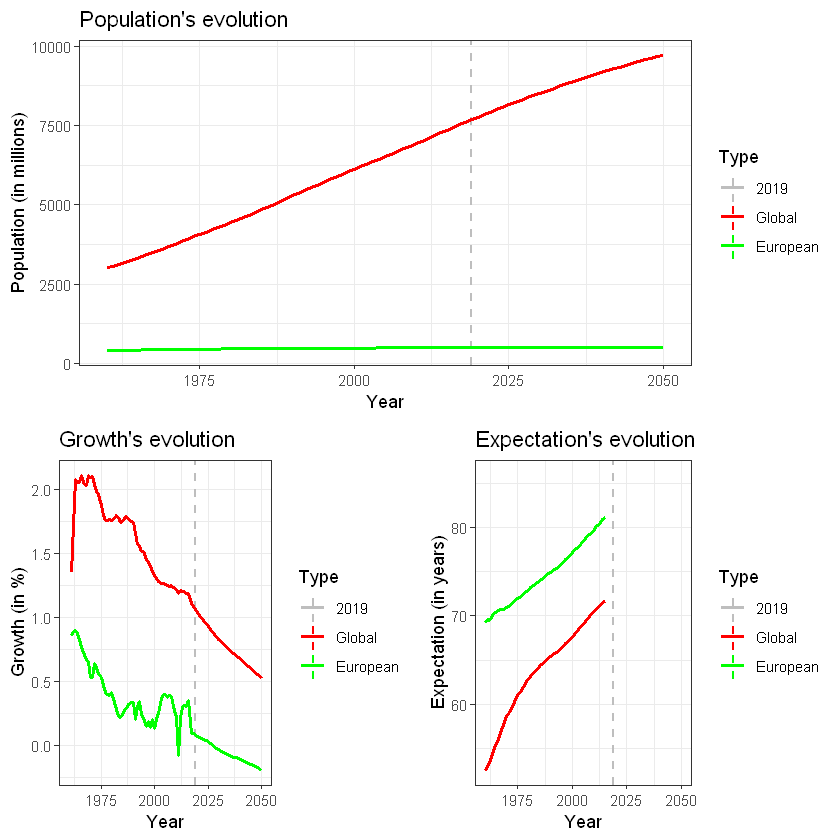

In [7]:
p1 = ggplot(df, aes(x = Year)) + theme_bw() +
     geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", size = 0.7) +
     geom_line(aes(y = Global_population, colour = "1"), size = 1, na.rm = TRUE) +
     geom_line(aes(y = Euro_population, colour = "2"), size = 1, na.rm = TRUE) +
     ylab("Population (in millions)") + ggtitle("Population's evolution") +
     scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Global", "European"))

p2 = ggplot(df, aes(x = Year)) + theme_bw() +
     geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", size = 0.7) +
     geom_line(aes(y = Global_growth, colour = "1"), size = 1, na.rm = TRUE) +
     geom_line(aes(y = Euro_growth, colour = "2"), size = 1, na.rm = TRUE) +
     ylab("Growth (in %)") + ggtitle("Growth's evolution") +
     scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Global", "European"))

p3 = ggplot(df, aes(x = Year)) + theme_bw() +
     geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", size = 0.7) +
     geom_line(aes(y = Global_expectation, colour = "1"), size = 1, na.rm = TRUE) +
     geom_line(aes(y = Euro_expectation, colour = "2"), size = 1, na.rm = TRUE) +
     ylab("Expectation (in years)") + ggtitle("Expectation's evolution") +
     scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Global", "European"))

grid.arrange(p1, arrangeGrob(p2, p3, ncol = 2))

## Positive correlation between global population and year (Hypothesis 1)

We see visually that the Evolution of the global population is linear and increasing.
To prove this, we will approximate it by a linear regression of an affine function of type $\hat{Y} = ax + b$ and evaluate its coefficient of determination. If it is close enough to 1, we cannot reject this hypothesis.

We will therefore place a line with coefficients $a$ and $b$ in such a way that $\hat{Y}$ is close enough to the data $Y$ (i.e. $\epsilon_i$ is sufficiently low).

$\large{y_i = b + a x_i + \epsilon_i}$

We will measure the difference between the two lines with the Mean Squared Error (MSE).

$\large{
\epsilon_i = y_i-ax_i+b \hspace{1cm}
J(a,b) = \frac{1}{m}\sum\limits_{i=1}^m\epsilon_i^2
}$

To make life easier, we will write everything in vectors.

Our predictions will then be in the vector $\hat{Y} = X.\theta$

$\large{
\theta = \begin{bmatrix}b\\a\end{bmatrix} \hspace{1cm}
Y = \begin{bmatrix} y_1\\ y_2 \\ ... \\ y_m \end{bmatrix} \hspace{1cm}
X = \begin{bmatrix} 1&x_1 \\ 1&x_2 \\ ...&... \\ 1&x_m \end{bmatrix} \hspace{1cm}
}$

$\large{\epsilon = y_i - (\theta_0 + \theta_1 x_i) = Y-X.\theta} = Y - \hat{Y}$

$\large{J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m\epsilon^2}$

To be able to do a linear regression as well as possible, we try to minimize this error $J(\theta)$, the function being convex, we then try to solve

$\large{ \frac{\partial J(\theta)}{\partial\theta} = 0}$

Step by step this gives us first $\theta_0$

$\large{\frac{\partial J(\theta)}{\partial\theta_0} = \frac{\partial J(\theta)}{\partial\epsilon} \cdot \frac{\partial\epsilon}{\partial\theta_0} = \sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)^2}$

$\large{0 = \sum\limits_{i=1}^m 2(Y_i-\theta_0-\theta_1X_i) * 1}$

$\large{0 = 2\sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)}$

$\large{0 = \sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)}$

$\large{0 = \sum\limits_{i=1}^mY_i -m\theta_0-\theta_1\sum\limits_{i=1}^mX_i}$

$\large{m\theta_0 = \sum\limits_{i=1}^mY_i -\theta_1\sum\limits_{i=1}^mX_i}$

$\large{\large{\theta_0 = \bar{Y} -\theta_1 \bar{X}}}$

Then for $\theta_1$

$\large{\frac{\partial J(\theta)}{\partial\theta_1} = \sum\limits_{i=1}^m(Y_i-\theta_0+\theta_1X_i)^2}$

$\large{0 = \sum\limits_{i=1}^m -2(Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = -2\sum\limits_{i=1}^m (Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = \sum\limits_{i=1}^m (Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = \sum\limits_{i=1}^m (X_iY_i-\theta_0 X-\theta_1X_i^2)}$

$\large{0 = \sum\limits_{i=1}^m (X_iY_i) - \theta_0\sum\limits_{i_1}^m X_i - \theta_1\sum\limits_{i=1}^m X_i^2}$

$\large{0 = \overline{XY} - \theta_0\bar{X} - \theta_1\bar{X^2}}$

$\large{-\overline{XY} = -\theta_0\bar{X} - \theta_1\bar{X^2}}$

$\large{\overline{XY} = \theta_0\bar{X} + \theta_1\bar{X^2}}$

With the result $\theta_0$ obtained previously

$\large{\overline{XY} = (\bar{Y} - \theta_1\bar{X})\bar{X} + \theta_1\bar{X^2}}$

$\large{\overline{XY} = \bar{Y}\bar{X} - \theta_1\bar{X}^2 + \theta_1\bar{X^2}}$

$\large{\overline{XY} - \bar{Y}\bar{X} = - \theta_1\bar{X}^2 + \theta_1\bar{X^2}}$

$\large{\overline{XY} - \bar{Y}\bar{X} = \theta_1\bar{X^2} - \theta_1\bar{X}^2}$

$\large{\overline{XY} - \bar{Y}\bar{X} = \theta_1(\bar{X^2} - \bar{X}^2)}$

$\large{\theta_1 = \frac{\overline{XY} - \bar{Y}\bar{X}}{\bar{X^2} - \bar{X}^2}}$

Each sample being independent $E(X) = \frac{1}{m}\sum\limits_{i=1}^m X_i$

$\large{\theta_1 = \frac{
E(X,Y) - E(X)E(Y)
}{
(\frac{1}{m}\sum\limits_{i=1}^m X_i^2) - \bar{X}^2
}}$

$\large{\theta_1 = \frac{Cov(X,Y)}{\sigma_x^2}}$

### Now that this is said, let's move on to the code

$\large{\bar{X} = \frac{1}{n}\sum\limits_{i=1}^n x_i}$

In [8]:
x_bar = mean(df$Year)
print(paste("x_bar =", x_bar))

[1] "x_bar = 2005"


$\large{\bar{Y} = \frac{1}{n}\sum\limits_{i=1}^n y_i}$

In [9]:
y_bar = mean(df$Global_population)
print(paste("y_bar =", y_bar))

[1] "y_bar = 6473.45632771129"


$\large{\theta_1 = \frac{Cov(X,Y)}{\sigma_x^2} = 78.244}$

In [10]:
theta_1 = cov(df$Year, df$Global_population) / var(df$Year)
print(paste("theta_1 =", theta_1))

[1] "theta_1 = 78.2438930928207"


$\large{\theta_0 = \bar{Y} - \theta_1 \bar{X} = -150405.549}$

In [11]:
theta_0 = y_bar - theta_1 * x_bar
print(paste("theta_0 =", theta_0))

[1] "theta_0 = -150405.549323394"


$\large{\hat{Y} = \hat{f}(x) = \theta_0 + \theta_1 x}$

In [12]:
df$Prediction = theta_0 + theta_1 * df$Year

### Visualisation of the prediction

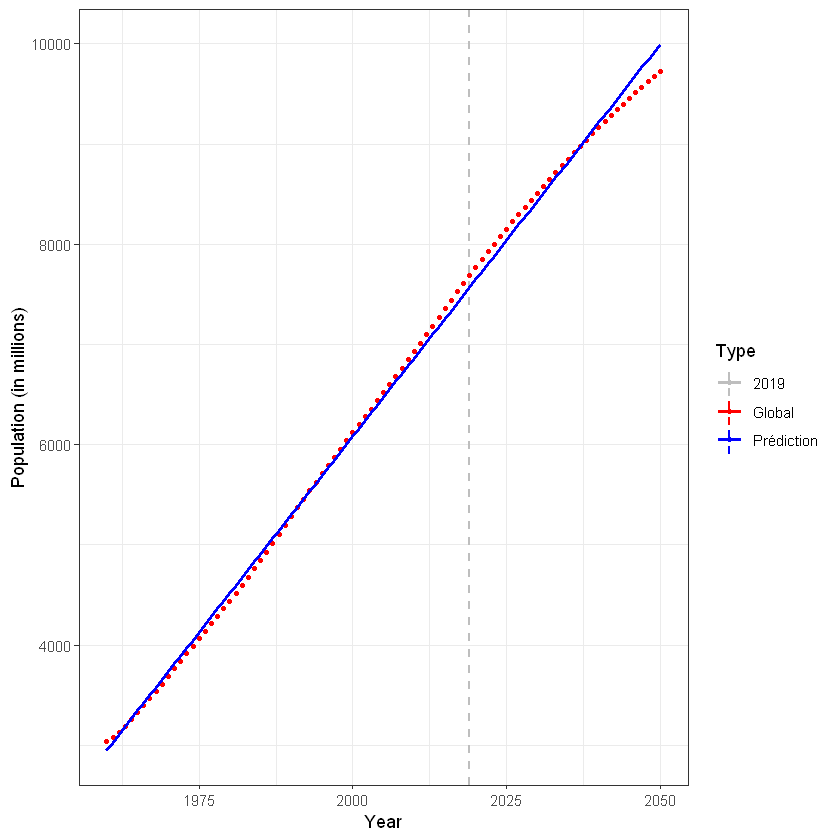

In [13]:
ggplot(df, aes(x = Year)) + theme_bw() + ylab("Population (in millions)") +
    geom_point(aes(y = Global_population, colour = "1"), size = 1) +
    geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", size = 0.7) +
    geom_line(aes(y = Prediction, colour = "2"), size = 1) +
    scale_colour_manual(name = "Type", values = c("grey", "red", "blue"), labels = c("2019", "Global", "Prédiction"))

### Measurement of model fit

Analysis of variance

Total sum of squares = Sum of regression squares + Sum of error squares

$\large{SST = SSR + SSE}$

$\large{\sum\limits_{i=1}^m(y_i-\bar{y})^2 = \sum\limits_{i=1}^m(\hat{y}_i-\bar{y})^2 + \sum\limits_{i=1}^m(y_i-\hat{y}_i)^2}$

In [14]:
y_bar = mean(df$Global_population)
print(paste("y_bar =", y_bar))
sst = sum((df$Global_population - y_bar)^2)
print(paste("sst =", sst))
ssr = sum((df$Prediction - y_bar)^2)
print(paste("ssr =", ssr))
sse = sum((df$Global_population - df$Prediction)^2)
print(paste("sse =", sse))

[1] "y_bar = 6473.45632771129"
[1] "sst = 385075719.013343"
[1] "ssr = 384407086.36888"
[1] "sse = 668632.644463659"


Relative criterion

$R^2$: coefficient of determination

$\large{R^2 = \frac{SSR}{SST} = \frac{\sum\limits_{i=1}^m(\hat{y}_i-\bar{y})^2}{\sum\limits_{i=1}^m(y_i-\bar{y})^2}}$

Or

$\large{R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum\limits_{i=1}^m(y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^m(y_i-\bar{y})^2}}$

$0 \leq R^2 \leq 1$

$R^2 \approx 1 \rightarrow$ The model is adequate.

$R^2 \approx 0 \rightarrow$ The model is inadequate.

In [15]:
print(paste("R^2 =", 1 - sse/sst))

[1] "R^2 = 0.998263633328591"


In [16]:
print(paste("R^2 =", ssr / sst))

[1] "R^2 = 0.998263633328592"


__Our model explains 99.83% of the variance in the data__

$R$: Correlation coefficient

$R = \frac{Cov(X,Y)}{\sigma_{x}\sigma_{y}}$

$R \approx -1 \rightarrow$ negative correlation

$R \approx 0 \rightarrow$ no correlation

$R \approx 1 \rightarrow$ positive correlation

In [17]:
r = cov(df$Year, df$Global_population) / (sd(df$Year) * sd(df$Global_population))
print(paste("R =", r))

[1] "R = 0.999131439465595"


__Our model does not allow us to reject the hypothesis $H_0$__

#### Units of measurement of model adequacy

Mean Absolute Error (MAE)

$\large{MAE = \frac{1}{N}\sum\limits_{i=1}^N|y_i-\hat{y}_i|}$

In [18]:
print(paste("MAE =", mean(abs(df$Global_population - df$Prediction))))

[1] "MAE = 69.3300518887301"


Mean Squared Error (MSE)

$\large{MSE = \frac{1}{N}\sum\limits_{i=1}^N(y_i-\hat{y}_i)^2 = \frac{SSE}{N}}$

In [19]:
mse = sse / (length(df$Year))
print(paste("MSE =", mse))

[1] "MSE = 7347.61147762263"


Root Mean Squared Error (RMSE)

$\large{RMSE = \sqrt{MSE}}$

In [20]:
rmse = sqrt(mse)
print(paste("RMSE =", rmse))

[1] "RMSE = 85.7182097201209"


## Residue analysis

- Residue formula
$\rightarrow \large{\epsilon_i = y_i - \hat{y}_i}$

- Studentized residue
$\rightarrow \large{\epsilon_i = \frac{y_i - \hat{y}_i}{RMSE\sqrt{1-h_i}}}$

where
$\rightarrow \large{h_i=\frac{1}{N}+\frac{(x_i-\bar{x})^2}{\sum\limits_{i=1}^N(x_i-\bar{x})^2}}$

In [21]:
x_bar = mean(df$Year)
h = 1 / length(df$Year) + ((df$Year - x_bar)^2) / sum((df$Year - x_bar)^2)
e = (df$Global_population - df$Prediction) / (sqrt(1 - h))
stde = (df$Global_population - df$Prediction) / (rmse * sqrt(1 - h))
residus = data.frame(x = df$Year, "Influence" = h, "Residue" = e, stde = stde)

### Visualisation

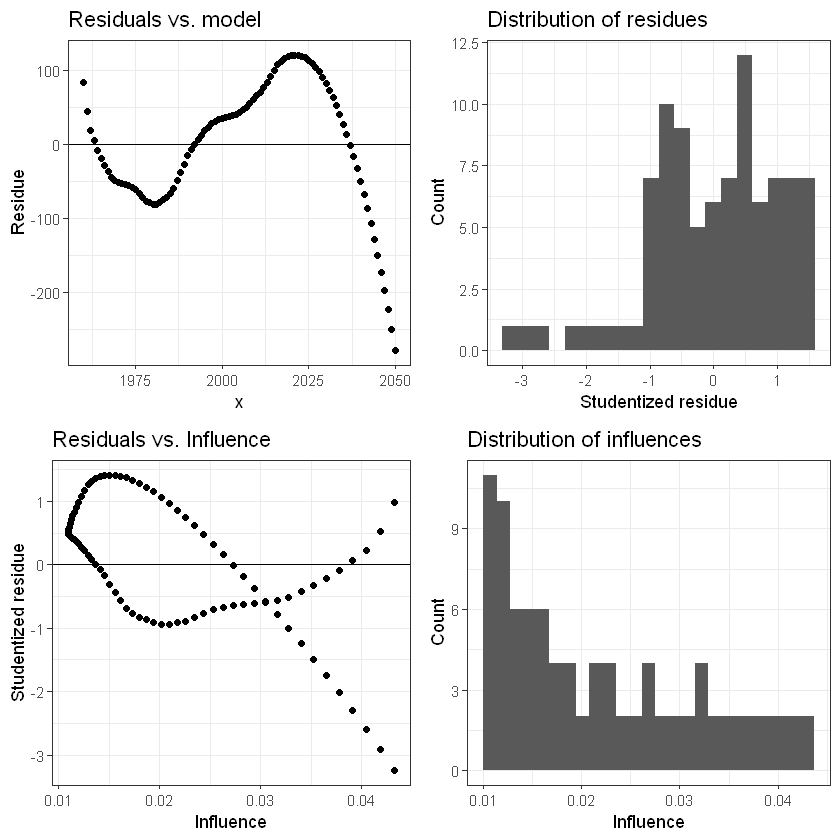

In [22]:
rvl = ggplot(residus) + theme_bw() +
    geom_point(aes(x = Influence, y = stde)) +
    ylab("Studentized residue") +
    geom_hline(aes(yintercept = 0)) +
    ggtitle("Residuals vs. Influence")

hist_e = ggplot(residus) + theme_bw() +
    geom_histogram(aes(x = stde), bins = 20) +
    xlab("Studentized residue") + ylab("Count") +
    ggtitle("Distribution of residues")

rvf = ggplot(residus) + theme_bw() +
    geom_point(aes(x = x, y = Residue)) +
    geom_hline(aes(yintercept = 0)) +
    ggtitle("Residuals vs. model")

hist_l = ggplot(residus) + theme_bw() +
    geom_histogram(aes(x = Influence), bins = 25) +
    ylab("Count") + xlab("Influence") +
    ggtitle("Distribution of influences")

grid.arrange(rvf, hist_e, rvl, hist_l)

## The average population increased between $[1960, 2010]$ and $[2011, 2017]$ (Hypothesis 2)

We will therefore test the following (left-sided) hypothesis

$\mu_{pop1} = \frac{1}{n}\sum\limits_{i=1}^n population\_global[1960, 2010]^{(i)} \hspace{1cm} \mu_{pop2} = \frac{1}{n}\sum\limits_{i=1}^n population\_global[2011, 2017]^{(i)}$

$H_0 = \mu_{pop1} - \mu_{pop2} \geq 0$

$H_1 = \mu_{pop1} - \mu_{pop2} < 0$

In [23]:
df_1 = df[df$Year >= 1960 & df$Year <= 2010,]
df_2 = df[df$Year >= 2011 & df$Year <= 2017,]
hypothesis_test(df_1$Global_population, df_2$Global_population)

[1] "t_value = -13.1374810522537"
[1] "ddl = 56"
[1] "p_value = -1.67252230307558"
[1] "t_value < p_value ? TRUE"


__We can therefore reject the hypothesis $H_0$__

## Global growth in $[1960, 2010]$ is higher than European growth in $[2011, 2017]$ (Hypothesis 3)

We will therefore test the following (left-sided) hypothesis

$C_{m} = \frac{1}{n}\sum\limits_{i=1}^n global\_growth[1960, 2010]^{(i)} \hspace{1cm} C_{e} = \frac{1}{n}\sum\limits_{i=1}^n european\_growth[2011, 2017]^{(i)}$

$H_0 = C_{m} - C_{e} \geq 0$

$H_1 = C_{m} - C_{e} < 0$

In [24]:
pop1 = df_1$Global_growth[-c(1)] # The first value is NA
hypothesis_test(pop1, df_2$Euro_growth)

[1] "t_value = 20.2333656712816"
[1] "ddl = 55"
[1] "p_value = -1.67303396528991"
[1] "t_value < p_value ? FALSE"


__We can therefore reject the hypothesis $H_0$__

## The proportion of Europeans over 65 is lower in $[1960, 2010]$ than in $[2011, 2017]$ (Hypothesis 4)

We will therefore test the following (one-sided) hypothesis

$S_1 = \frac{1}{n}\sum\limits_{i=1}^n senior\_proportion[1960, 2010]^{(i)} \hspace{1cm} S_{2} = \frac{1}{n}\sum\limits_{i=1}^n senior\_proportion[2011, 2017]^{(i)}$

$H_0 = S_1 - S_2 \leq 0$

$H_1 = S_1 - S_2 > 0$

In [25]:
hypothesis_test(df_1$Senior, df_2$Senior, FALSE)

[1] "t_value = -12.7890414432725"
[1] "ddl = 56"
[1] "p_value = 1.67252230307558"
[1] "t_value > p_value ? FALSE"


__We can therefore reject the hypothesis $H_0$__

## Current health expenditure in OECD countries file (INSEE)

In [26]:
dep = read_excel("data/cond-sante-dep-courante-monde.xlsx", skip = 3, n_max = 37)
dep = dep[, -ncol(dep)] # The last year contains only estimates or provisional data and is therefore ignored.
print(sprintf("The file cond-sante-dep-courante-monde.xlsx has %d * %d lines", ncol(dep), nrow(dep)))
head(dep)

[1] "The file cond-sante-dep-courante-monde.xlsx has 20 * 37 lines"


Pays,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
États-Unis,12.542,13.219,14.007,14.522,14.610,14.606,14.702,14.919,15.286,16.284,16.345,16.300,16.285,16.210,16.406,16.711,17.049,17.004,16.885
Suisse,9.375,9.730,10.138,10.400,10.479,10.294,9.818,9.629,9.754,10.379,10.276,10.341,10.618,10.831,10.994,11.369,11.709,11.895,11.876
Allemagne,9.888,9.920,10.184,10.402,10.146,10.311,10.180,10.051,10.251,11.238,11.097,10.776,10.847,10.992,11.016,11.164,11.233,11.374,11.471
France,9.584,9.706,10.022,10.083,10.164,10.215,10.393,10.331,10.512,11.297,11.240,11.202,11.313,11.436,11.581,11.466,11.501,11.401,11.294
Japon,7.151,7.359,7.473,7.611,7.657,7.781,7.808,7.890,8.200,9.058,9.157,10.617,10.791,10.792,10.832,10.886,10.835,10.796,10.953
Suède,7.369,7.944,8.254,8.366,8.179,8.199,8.102,8.044,8.243,8.802,8.336,10.446,10.766,10.945,10.980,10.828,10.839,10.795,10.886


### Transposition in dataframe

In [27]:
dep = t(dep)
colnames(dep) = dep[1, ]
rownames(dep) = NULL
dep = data.frame(apply(dep[-c(1), ], 2, function(x) as.numeric(as.character(x))))
dep = data.frame(Year = (0:18) + 2e3, dep)
head(dep)

,Year,États.Unis,Suisse,Allemagne,France,Japon,Suède,Canada,Norvège,Autriche,...,Slovaquie,Irlande,Lituanie,Estonie,Hongrie,Pologne,Lettonie,Mexique,Luxembourg,Turquie
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000,12.542,9.375,9.888,9.584,7.151,7.369,8.248,7.712,9.204,...,5.303,5.905,6.192,5.157,6.778,5.298,5.450,4.449,5.901,4.622
2,2001,13.219,9.730,9.920,9.706,7.359,7.944,8.625,8.022,9.269,...,5.332,6.399,6.006,4.777,6.826,5.679,5.789,4.820,6.410,4.924
3,2002,14.007,10.138,10.184,10.022,7.473,8.254,8.857,9.001,9.395,...,5.509,6.675,6.136,4.700,7.121,6.079,5.779,5.072,6.738,5.101
4,2003,14.522,10.400,10.402,10.083,7.611,8.366,9.011,9.215,9.547,...,5.448,7.009,6.179,4.859,8.119,5.962,5.498,5.815,6.971,5.059
5,2004,14.610,10.479,10.146,10.164,7.657,8.179,9.066,8.821,9.709,...,6.469,7.225,5.506,5.120,7.770,5.869,6.237,5.954,7.347,4.959
6,2005,14.606,10.294,10.311,10.215,7.781,8.199,9.035,8.328,9.627,...,6.589,7.648,5.642,5.058,8.001,5.807,5.865,5.836,7.184,4.942


### Removal of non-EU states

In [28]:
hors_eu = c("États.Unis", "Japon", "Chili", "Corée.du.sud", "Slovénie", "Israël", "Mexique", "Turquie", "Canada", "Australie", "Nouvelle.Zélande")
dep = dep[!(colnames(dep) %in% hors_eu)]
dep = dep[dep$Year <= 2015, ]
head(dep)

,Year,Suisse,Allemagne,France,Suède,Norvège,Autriche,Belgique,Royaume.Uni,Danemark,...,République.tchèque,Colombie,Slovaquie,Irlande,Lituanie,Estonie,Hongrie,Pologne,Lettonie,Luxembourg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000,9.375,9.888,9.584,7.369,7.712,9.204,7.999,7.284,8.104,...,5.718,5.635,5.303,5.905,6.192,5.157,6.778,5.298,5.450,5.901
2,2001,9.730,9.920,9.706,7.944,8.022,9.269,8.150,7.655,8.448,...,5.888,5.942,5.332,6.399,6.006,4.777,6.826,5.679,5.789,6.410
3,2002,10.138,10.184,10.022,8.254,9.001,9.395,8.318,8.024,8.703,...,6.199,5.733,5.509,6.675,6.136,4.700,7.121,6.079,5.779,6.738
4,2003,10.400,10.402,10.083,8.366,9.215,9.547,9.208,8.212,8.904,...,6.554,5.775,5.448,7.009,6.179,4.859,8.119,5.962,5.498,6.971
5,2004,10.479,10.146,10.164,8.179,8.821,9.709,9.367,8.484,9.007,...,6.385,5.799,6.469,7.225,5.506,5.120,7.770,5.869,6.237,7.347
6,2005,10.294,10.311,10.215,8.199,8.328,9.627,9.262,8.534,9.091,...,6.381,6.067,6.589,7.648,5.642,5.058,8.001,5.807,5.865,7.184


### Translation of country names into English

In [29]:
trad = c('Year', 'Switzerland', 'Germany', 'France', 'Sweden', 'Denmark', 'Belgium', 'Austria', 'Norway', 'Netherlands', 'United Kingdom',
         'New Zealand', 'Portugal', 'Finland', 'Spain', 'Italy', 'Iceland', 'Greece', 'Czech Republic', 'Ireland', 'Lithuania', 'Slovak Republic',
         'Hungary', 'Estonia', 'Poland', 'Latvia', 'Luxembourg')

## Is there a correlation between life expectancy and current health expenditure in Europe (Hypothesis 5)

We will calculate the correlation coefficient for each country by crossing the data frames

As a reminder:

$R = \frac{Cov(X,Y)}{\sigma_{x}\sigma_{y}}$

$R \approx -1 \rightarrow$ negative correlation

$R \approx 0 \rightarrow$ no correlation

$R \approx 1 \rightarrow$ positive correlation

In [30]:
esp = estim[estim$'Series.Code' == 'SP.DYN.LE00.IN' & estim$'Country.Name' %in% trad, c(1, 45 : 60)]
esp = t(as.data.frame(esp))
rownames(esp) = NULL
colnames(esp) = esp[1, ]
esp = esp[-c(1), ]
esp = data.frame(Year = (0:15) + 2e3, esp)
head(esp)

,Year,Austria,Belgium,Czech.Republic,Denmark,Estonia,Finland,France,Germany,Greece,...,Netherlands,New.Zealand,Norway,Poland,Portugal,Slovak.Republic,Spain,Sweden,Switzerland,United.Kingdom
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2000,78.12683,77.72195,74.96829,76.59268,70.41707,77.46585,79.05610,77.92683,77.88780,...,77.98780,78.63659,78.63415,73.74878,76.31463,73.05122,78.96585,79.64390,79.68049,77.74146
2,2001,78.57561,77.97317,75.17317,76.79268,70.25854,77.96585,79.15854,78.32927,78.38780,...,78.19024,78.69268,78.78537,74.20000,76.81463,73.40244,79.36829,79.79512,80.18049,77.99268
3,2002,78.67805,78.07561,75.22195,76.89512,70.90488,78.11951,79.26098,78.22927,78.64146,...,78.29268,78.84634,78.98780,74.49756,77.06585,73.60488,79.56829,79.84634,80.38537,78.14390
4,2003,78.63171,78.12927,75.17073,77.14390,71.31707,78.36829,79.11463,78.38049,78.84146,...,78.49268,79.14634,79.39024,74.59756,77.21951,73.60488,79.61951,80.09512,80.53659,78.44634
5,2004,79.18049,78.87805,75.72195,77.49268,71.90976,78.71463,80.16341,78.68049,79.03902,...,79.09512,79.54878,79.84146,74.84634,77.67073,73.95854,79.87073,80.49756,81.08780,78.74634
6,2005,79.33171,78.98049,75.92439,77.84390,72.56829,78.81707,80.16341,78.93171,79.23902,...,79.34634,79.85122,80.04146,74.99512,78.07073,73.90488,80.17073,80.54634,81.23659,79.04878


### Calculation of the R coefficients

[1] "Average r coefficient = 0.614244"


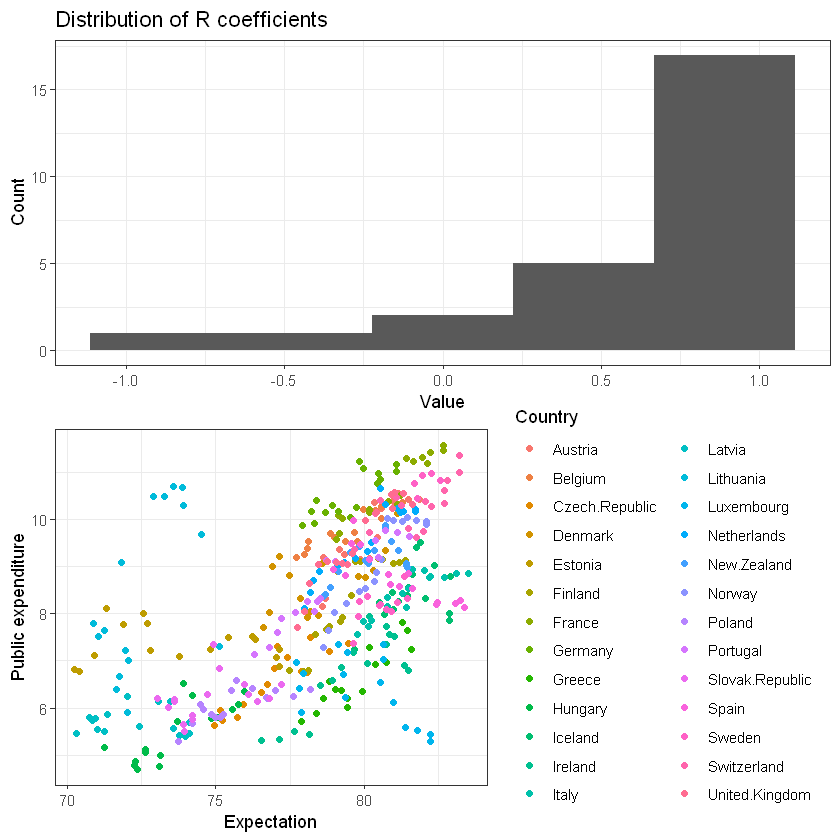

In [31]:
esp_names = colnames(esp)
indexes = match(esp_names, gsub(" ", ".", trad))
coef_r = c()
xs = c()
xs = c()
ys = c()
country_names = c()
for(i in (2 : length(indexes))){
    x = as.numeric(as.character(esp[, i]))
    xs = c(xs, x)
    y = dep[, indexes[i]]
    ys = c(ys, y)
    cxy = cov(x, y)
    sdxy = sd(x) * sd(y)
    coef_r = c(coef_r, cxy / sdxy)
    country_names = c(country_names, rep(esp_names[i], length(x)))
}
coefs_r = data.frame(Index = (1 : length(coef_r)), "Value" = coef_r)
insee = data.frame("Country" = country_names, "Expectation" = xs, "Public expenditure" = ys)

print(sprintf("Average r coefficient = %f", mean(coefs_r$Value)))

h1 = ggplot(coefs_r) + ylab("Count") + theme_bw() +
     geom_histogram(aes(x = Value), bins = 5) +
     ggtitle("Distribution of R coefficients")     

h2 = ggplot(insee) + ylab("Public expenditure") + theme_bw() +
     geom_point(aes(x = Expectation, y = Public.expenditure, col = Country))     

grid.arrange(h1, h2)

It can therefore be concluded that there is a correlation between life expectancy and current health expenditure.

_Pierre Saunders @saundersp_